## TAREA 
### Ralphy Núñez Mercado

1. Ahora, elige uno o dos datasets para probar el algoritmo de Random Forest tanto en su versión de regresión como en clasificación.  
2. Prueba los "ensemble methods" : comienza por los de Votación (VotingClassifier, VotingRegressor) y continúa con los demás (stacking y boosting: XGBoost)  

### Imports


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error ,r2_score, classification_report,confusion_matrix,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, VotingRegressor,RandomForestRegressor,StackingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor


## RandomForestRegressor

> Random Forest es un método que combina las predicciones de múltiples árboles de decisión para producir un resultado más preciso y estable. Lo podemos usar en tareas de regresión o clasificación.

### Preparar el dataset

In [2]:
df_vino=pd.read_csv("winequality-red.csv")
df_vino.columns=['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Alcohol','Calidad']
df_vino
df_vino['Densidad'] = df_vino['Densidad'].apply(lambda x: f"{x:,.3f}")
df_vino['Cloruros'] = df_vino['Cloruros'].apply(lambda x: f"{x:,.3f}")
df_vino

df_vino[['Alcohol', 'Calidad']] 

X_vino = df_vino[['Acido Fijo','Acido Volatil','Acido Citrico','Azucar Residual','Cloruros','Dioxido de sulfuro libre','Dioxido de sulfuro total','Densidad','Ph','Sulfatos','Calidad']]
y_vino = df_vino['Alcohol']

X_train_vino, X_test_vino, y_train_vino, y_test_vino = train_test_split(X_vino, y_vino, test_size=0.2, random_state=42)


### Crear y entrenar el modelo

In [3]:
# Crear y entrenar el modelo
regr = RandomForestRegressor(n_estimators=100, max_depth=2, random_state=42, oob_score=True)
regr.fit(X_train_vino, y_train_vino)

prediccion_vino = regr.predict(X_test_vino)


### Mostramos las métricas

In [4]:
mse = mean_squared_error(y_test_vino, prediccion_vino)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test_vino, prediccion_vino)
r2 = r2_score(y_test_vino, prediccion_vino)

print("MSE (Error Cuadrático Medio:", mse)
print("RMSE (Raíz del Error Cuadrático Medio):", rmse)
print("MAE (Error Absoluto Medio):", mae)
print("R2 Score (Coeficiente de Determinación):", r2)



MSE (Error Cuadrático Medio: 0.6259179329500629
RMSE (Raíz del Error Cuadrático Medio): 0.7911497538077497
MAE (Error Absoluto Medio): 0.6099895928929078
R2 Score (Coeficiente de Determinación): 0.49722564670144087


### Mostrar gráfica

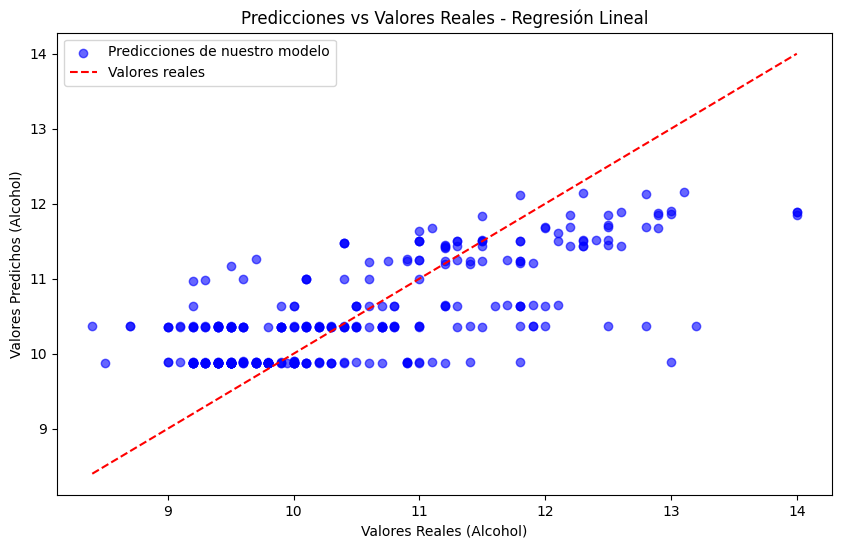

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vino, prediccion_vino, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test_vino.min(), prediccion_vino.min()), max(y_test_vino.max(), prediccion_vino.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.legend()
plt.show()

## RandomForestClassifier


### Preparar el dataset

In [6]:

df_cancer = pd.read_csv('Breast_Cancer.csv')

df_cancer = df_cancer.drop("Unnamed: 32",axis=1)

df_cancer.columns=["id", "diagnostico", "radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]


X_cancer  = df_cancer[["radio_medio", "textura_media", "perimetro_medio", "area_media", "suavidad_media", "compacidad_media"," concavidad_media", "media_puntos_concavidad", "media_simetria", "media_dimension_fractal", "radio_se", "textura_se", "perimetro_se"," area_se", "suavidad_se", "compacidad_se", "concavidad_se"," concavo_puntos_se"," simetria_se", "fractal_dimension_peor", "radio_peor", "textura_peor", "perimetro_peor"," area_peor", "suavidad_peor"," compacidad_peor", "concavidad_peor", "puntos_concavos_peor"," simetia_peor"," fractal_dimension_peor"]]
df_cancer['diagnostico'] = df_cancer.diagnostico.map({'M' : 1, 'B' : 0 })
y_cancer = df_cancer['diagnostico']

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)


### Entrenar el modelo

In [7]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42)

rnd_clf.fit(X_train_cancer, y_train_cancer)
y_pred_rf = rnd_clf.predict(X_test_cancer)

###  Mostramos las métricas

In [8]:
print(classification_report(y_test_cancer,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
rnd_clf.fit(X_train_cancer, y_train_cancer).score(X_test_cancer, y_test_cancer)

0.9649122807017544

### Matriz de confusión

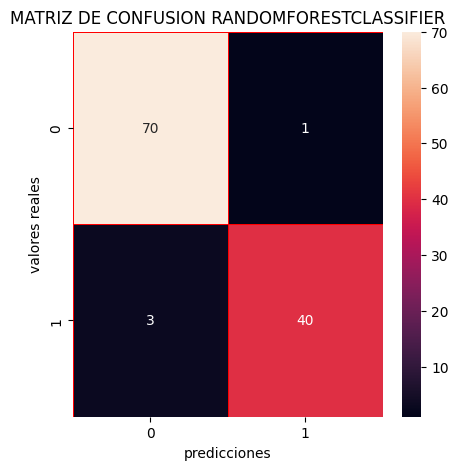

In [10]:
cm= confusion_matrix(y_test_cancer,y_pred_rf) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION RANDOMFORESTCLASSIFIER")
plt.show()

# Ensemble methods

## VotingRegressor

> Voting Regressor/Classifier es un método especial que combina varios modelos de regression/classification que, en teoría, debería ser mejor que los modelos individualmente. 

### Entrenar el modelo

In [11]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()
er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

er.fit(X_train_vino,y_train_vino)

prediccion_vino2 = er.predict(X_test_vino)


### Mostrar las métricas 

In [12]:
mse = mean_squared_error(y_test_vino, prediccion_vino2)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test_vino, prediccion_vino2)
r2 = r2_score(y_test_vino, prediccion_vino2)

print("MSE (Error Cuadrático Medio:", mse)
print("RMSE (Raíz del Error Cuadrático Medio):", rmse)
print("MAE (Error Absoluto Medio):", mae)
print("R2 Score (Coeficiente de Determinación):", r2)

MSE (Error Cuadrático Medio: 0.4030765096516866
RMSE (Raíz del Error Cuadrático Medio): 0.634883067699625
MAE (Error Absoluto Medio): 0.4829177774165217
R2 Score (Coeficiente de Determinación): 0.6762250755225836


### Mostrar gráfica

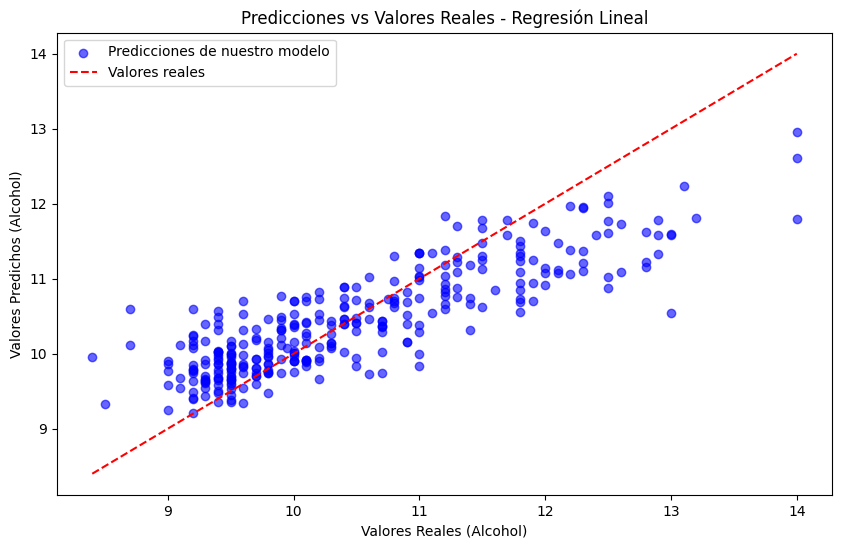

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_vino, prediccion_vino2, color='blue', alpha=0.6, label='Predicciones de nuestro modelo')
limites = np.array([min(y_test_vino.min(), prediccion_vino2.min()), max(y_test_vino.max(), prediccion_vino2.max())])
plt.plot(limites, limites, color='red', linestyle='--', label='Valores reales')
plt.title('Predicciones vs Valores Reales - Regresión Lineal')
plt.xlabel('Valores Reales (Alcohol)')
plt.ylabel('Valores Predichos (Alcohol)')
plt.legend()
plt.show()

## Voting Classifier

### Escalamos los datos de X_train y X_test

In [14]:
scaler = StandardScaler()
X_train_cancer_escalado = scaler.fit_transform(X_train_cancer)
X_test_cancer_escalado = scaler.transform(X_test_cancer)

### Entrenamiento del modelo

In [15]:
clf1 = LogisticRegression(random_state=1,max_iter=500)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

eclf1 = eclf1.fit(X_train_cancer_escalado, y_train_cancer)


eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

eclf2 = eclf2.fit(X_train_cancer_escalado, y_train_cancer)


pred_cancer_votingClassifier_hard = eclf1.predict(X_test_cancer_escalado)
pred_cancer_votingClassifier2_soft = eclf2.predict(X_test_cancer_escalado)

###  Mostramos las métricas

In [16]:
print(classification_report(y_test_cancer,pred_cancer_votingClassifier_hard))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [17]:
print(classification_report(y_test_cancer,pred_cancer_votingClassifier2_soft))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Mátrices de confusión

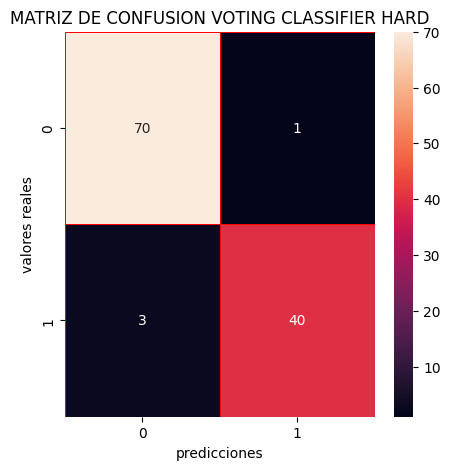

In [18]:
cm= confusion_matrix(y_test_cancer,pred_cancer_votingClassifier_hard) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION VOTING CLASSIFIER HARD")
plt.show()

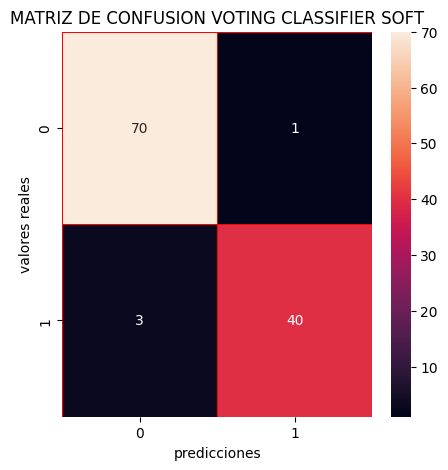

In [19]:
cm= confusion_matrix(y_test_cancer,pred_cancer_votingClassifier2_soft) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION VOTING CLASSIFIER SOFT")
plt.show()

## Stacking 

> El stacking consiste en apilar la salida de cada estimador y utilizar un clasificador/regresor para calcular la predicción final. El apilamiento permite aprovchar cada estimador individualmente al usar su salida como entrada para el estimador final.

### Stacking Regression

### Creamos el modelo

In [ ]:
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

final_estimator = GradientBoostingRegressor(
    n_estimators=25, subsample=0.5, min_samples_leaf=25, max_features=1,
    random_state=42)
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

### Entrenamos el modelo

In [21]:
reg.fit(X_train_vino, y_train_vino)

y_pred_stacking_regression = reg.predict(X_test_vino)

###  Mostramos las métricas

In [22]:
mse = mean_squared_error(y_test_vino, y_pred_stacking_regression)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test_vino, y_pred_stacking_regression)
r2 = r2_score(y_test_vino, y_pred_stacking_regression)

print("MSE (Error Cuadrático Medio:", mse)
print("RMSE (Raíz del Error Cuadrático Medio):", rmse)
print("MAE (Error Absoluto Medio):", mae)
print("R2 Score (Coeficiente de Determinación):", r2)

MSE (Error Cuadrático Medio: 0.8133956692470606
RMSE (Raíz del Error Cuadrático Medio): 0.9018845099274411
MAE (Error Absoluto Medio): 0.6940240111091253
R2 Score (Coeficiente de Determinación): 0.3466324256695056


### Stacking Classifier

In [23]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=20, random_state=42)),
    ('svr', make_pipeline(StandardScaler(),
                          LinearSVC(random_state=42)))
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_train_cancer, y_train_cancer)
y_pred_stacking_classifier = clf.predict(X_test_cancer)



###  Mostramos las métricas

In [24]:
print(classification_report(y_test_cancer,y_pred_stacking_classifier))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Conclusiones: 

### Regression:  

#### RandomForestRegressor:  

Con random forest el regresor, con este dataset, 
mejora un poco las metricas respecto a las calculadas en anteriores ejercicios pero nada destacable.

#### VotingRegressor:  

Con este regresor baja el MSE por lo que obtenemos un mejor resultado, esto debido a que combina diferente modelos.

#### StackingRegression:  

En este caso el modelo aumenta significativamente el MSE, por que el redimieto se ve afectado negativamente  
  

### Classification:  

#### RandomForestClassifier:  

Con random forest el clasificador, con este dataset, da unos valores similares a hacer esta misma clasificion con KNN

#### VotingClassifier:  

Este modelo da unos valores identicos a el modelo anterior

#### StackingClassifier:  

Este modelo empeora los la eficacia del modelo un poco